<h3 align = 'center'>in the name of god</h3>
<h2>CA#2</h2>
<h4>aidin kazemi</h4>
<hr></hr>


In [1]:
#pip install pandas numpy matplotlib scipy sympy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math 
import sympy as sy

<hr></hr>
<h3>QUESTION 1</h3>

<h5>1)</h5>

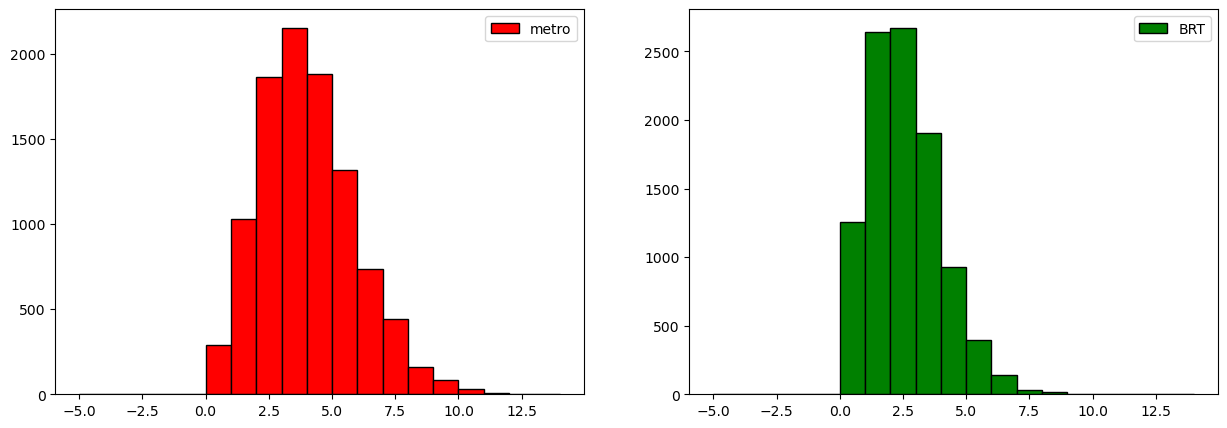

In [2]:
tarbiatdf = pd.read_csv("Tarbiat.csv")
fig,axs = plt.subplots(1,2)
fig.set_size_inches(15,5)
x_axis = np.arange(-5,15,1)

axs[0].hist(tarbiatdf.metro,x_axis,label="metro",color= 'red',edgecolor="black")
axs[1].hist(tarbiatdf.BRT,x_axis,label="BRT",color= 'green',edgecolor="black")
for ax in axs.flat:
    ax.legend()
plt.show()

<h5>2)</h5>
<p align = 'center'>in this problem we are facing an event which is happing once during some time, and as we know and the histograms aid, these two random variables are folowing the poisson distribution. their parameters can be found via histograms, by finding where it has the maximum value (around lambda is where this event is more likely to happen, based on poisson's distribution). for metro it is around 4 and for brt it is around 2.</p>

<h5>3)</h5>

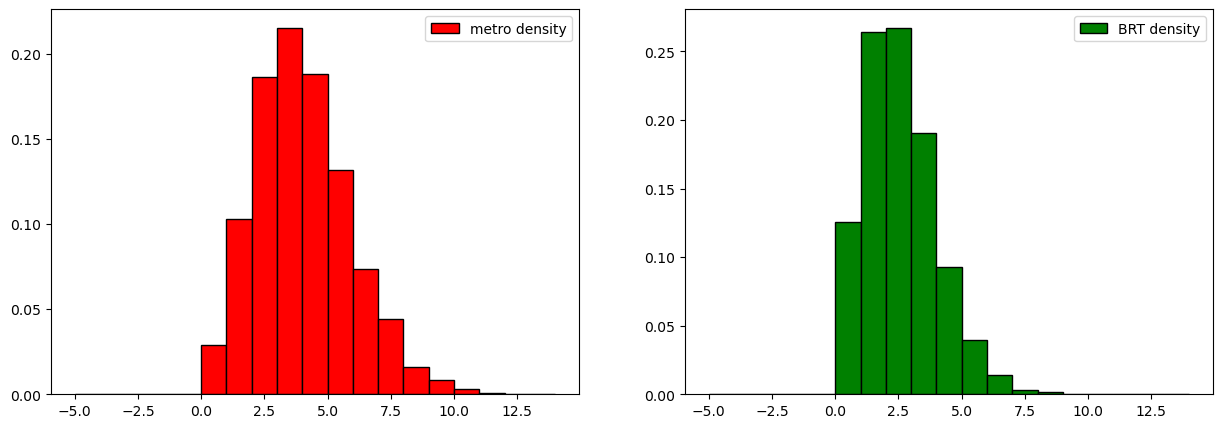

In [3]:
fig,axs = plt.subplots(1,2)
fig.set_size_inches(15,5)
x_axis = np.arange(-5,15,1)

axs[0].hist(tarbiatdf.metro,x_axis,label="metro density",color= 'red',edgecolor="black",density = "True")
axs[1].hist(tarbiatdf.BRT,x_axis,label="BRT density",color= 'green',edgecolor="black",density = "True")
for ax in axs.flat:
    ax.legend()
plt.show()

<h5>4)</h5>

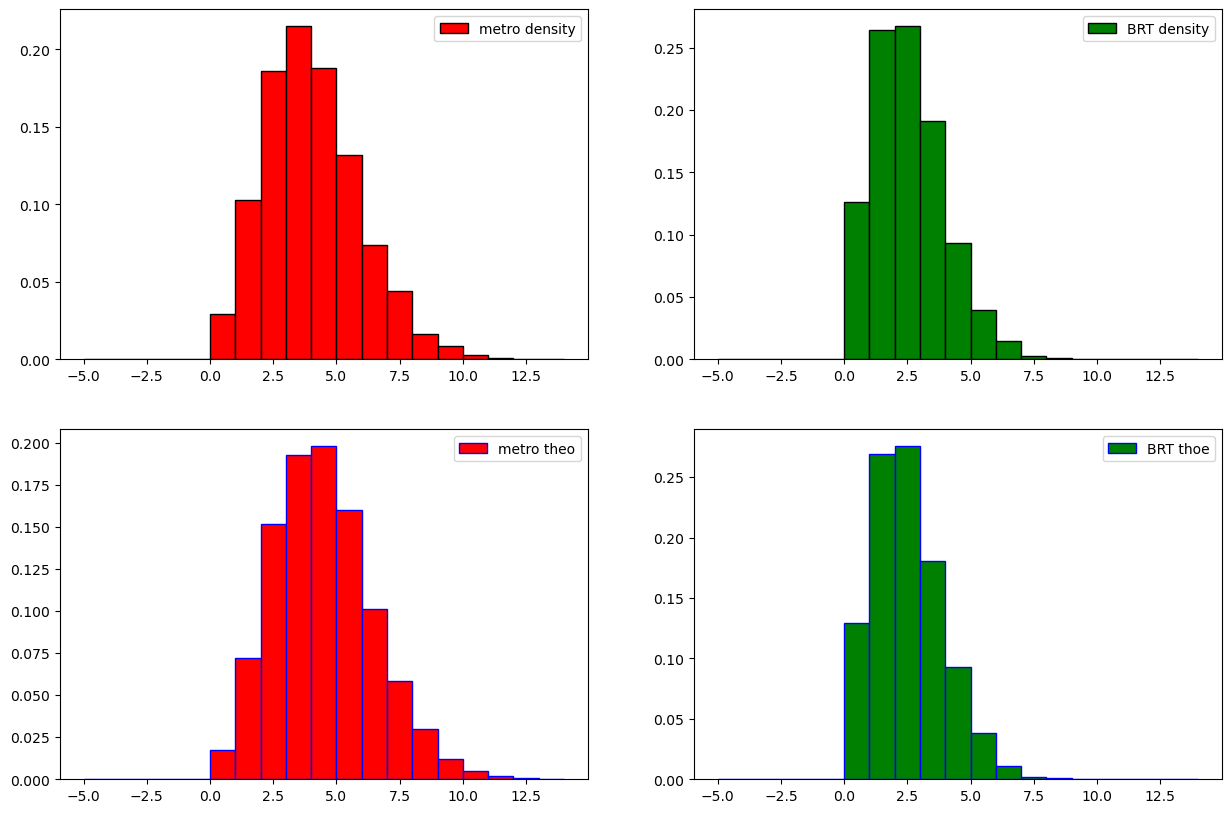

In [4]:
theo_metro_dist = np.random.poisson(4,10000)
theo_brt_dist = np.random.poisson(2,10000)

fig,axs = plt.subplots(2,2)
fig.set_size_inches(15,10)
x_axis = np.arange(-5,15,1)

axs[0,0].hist(tarbiatdf.metro,x_axis,label="metro density",color= 'red',edgecolor="black",density = "True")
axs[0,1].hist(tarbiatdf.BRT,x_axis,label="BRT density",color= 'green',edgecolor="black",density = "True")
axs[1,0].hist(theo_metro_dist,x_axis,label="metro theo",color= 'red',edgecolor="blue",density = "True")
axs[1,1].hist(theo_brt_dist,x_axis,label="BRT thoe",color= 'green',edgecolor="blue",density = "True")
for ax in axs.flat:
    ax.legend()
plt.show()

<p align = 'center'>as you can see the histograms perfectly match! which means our approximation was close to reality.</p>

<h5>5)</h5>
<p align = 'center'>sum of two independant poisson random variables still folow the poisson distribution, and it's parameter is equal to sum of those two rvs parameters, which will be 6 in this problem. now we code:</p>

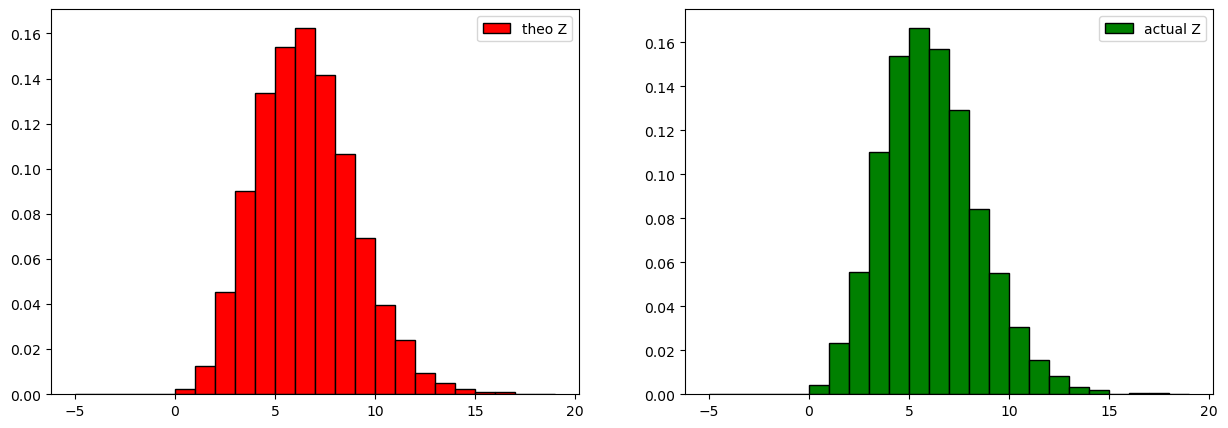

In [5]:
z_dist = np.random.poisson(6,10000)
sum_brt_metro = tarbiatdf.metro + tarbiatdf.BRT

fig,axs = plt.subplots(1,2)
fig.set_size_inches(15,5)
x_axis = np.arange(-5,20,1)

axs[0].hist(z_dist,x_axis,label="theo Z",color= 'red',edgecolor="black",density = "True")
axs[1].hist(sum_brt_metro,x_axis,label="actual Z",color= 'green',edgecolor="black",density = "True")
for ax in axs.flat:
    ax.legend()
plt.show()

<p align = 'center'>as you can see the histograms match in this section too. which means our approximation was close to reality.</p>


<h5>6)</h5>
<p>after some hand calculations, W is folowing binomial(n,lambda_x/(lambda_x + lambda_y)). i will just explain the workflow of soultion: first we rewrite the conditional expression in form of p(joint)/p(x + y = n). we have the p(x + y = n) from last problem, and for p joint we can find p(x = k, y = n - k), and as x and y are independant, it is equal to p(x=k) * p (y = n - k). the rest is operations, and finally W ~ binomial(n,0.67)</p>

<h5>7)</h5>

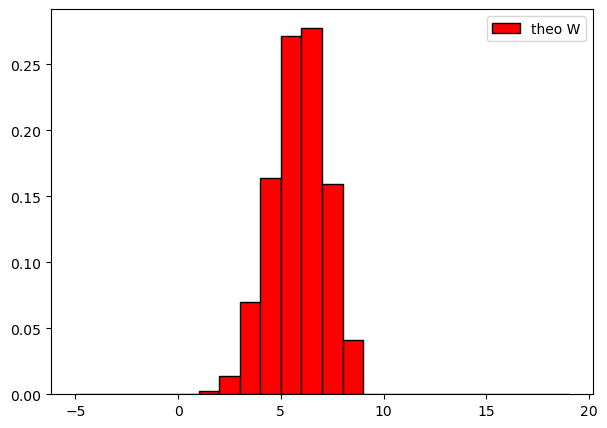

In [6]:
W_dist = np.random.binomial(8,0.67,10000)

fig,axs = plt.subplots(1,1)
fig.set_size_inches(7,5)
x_axis = np.arange(-5,20,1)

axs.hist(W_dist,x_axis,label="theo W",color= 'red',edgecolor="black",density = "True")

axs.legend()
plt.show()

<h5>8)</h5>

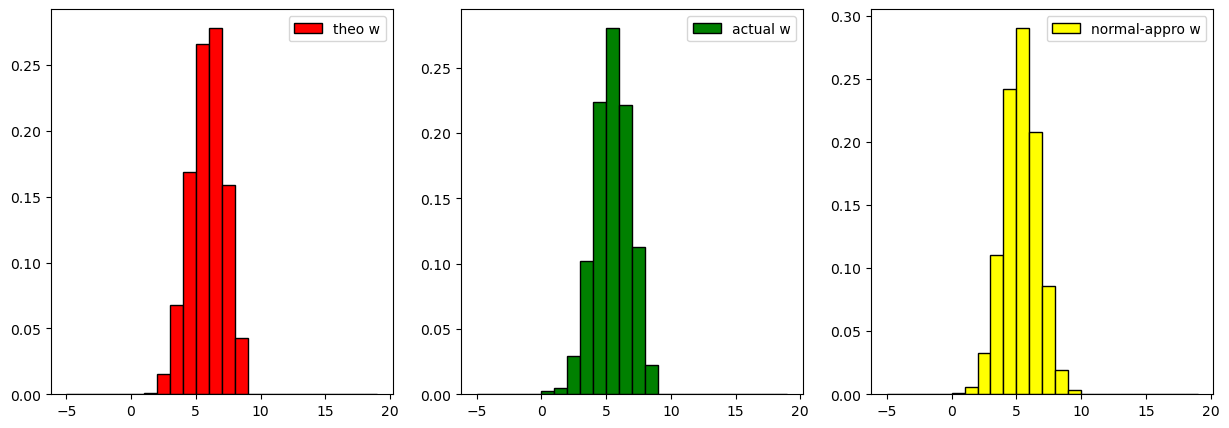

In [7]:
metro_and_brt_are_eight = sum_brt_metro.loc[sum_brt_metro == 8]
metro_if_sumIs8 = tarbiatdf.metro.loc[metro_and_brt_are_eight.index]
W_dist = np.random.binomial(8,0.67,10000)
ww_dist = np.random.normal(8 * 0.67,math.sqrt(8 * 0.67 * 0.33),10000)

fig,axs = plt.subplots(1,3)
fig.set_size_inches(15,5)
x_axis = np.arange(-5,20,1)

axs[0].hist(W_dist,x_axis,label="theo w",color= 'red',edgecolor="black",density = "True")
axs[1].hist(metro_if_sumIs8,x_axis,label="actual w",color= 'green',edgecolor="black",density = "True")
axs[2].hist(ww_dist,x_axis,label="normal-appro w",color= 'yellow',edgecolor="black",density = "True")
for ax in axs.flat:
    ax.legend()
plt.show()

<p align = 'center'>as you can see the histograms almost match in this section, except for candles in 6 and the value of maximum candle. overall it can be said that our approximation was close to reality with little amount of error, though as you can see the normal approximaiton of w seems to be more accurate, but it doesn't hurt the fact that the binomial approximation is still a good approximation.</p>

<hr></hr>
<h3>QUESTION 2</h3>
<h5>1)</h5>

In [8]:
def coupon_collector_monte_carlo(n, k):
    try_count_sum = 0
    for i in range(k):
        seen_coupons = set()
        try_count = 0

        while len(seen_coupons) < n:
            coupon = np.random.randint(1, n + 1) 
            seen_coupons.add(coupon)
            try_count += 1

        try_count_sum += try_count

    average_counts = try_count_sum / k
    return average_counts


<h5>2)</h5>

In [9]:
n = 10
k1 = 10
k2 = 100
k3 = 1000
k4 = 10000
average_counts1 = coupon_collector_monte_carlo(n, k1)
average_counts2 = coupon_collector_monte_carlo(n, k2)
average_counts3 = coupon_collector_monte_carlo(n, k3)
average_counts4 = coupon_collector_monte_carlo(n, k4)

print(f"average try counts with k = {k1} and n = {n} is: {average_counts1}")
print(f"average try counts with k = {k2} and n = {n} is: {average_counts2}")
print(f"average try counts with k = {k3} and n = {n} is: {average_counts3}")
print(f"average try counts with k = {k4} and n = {n} is: {average_counts4}")

average try counts with k = 10 and n = 10 is: 28.6
average try counts with k = 100 and n = 10 is: 30.58
average try counts with k = 1000 and n = 10 is: 28.859
average try counts with k = 10000 and n = 10 is: 29.0174


<p align = 'center'>and as you can see the answer is getting close to 29.3 .</p>

<h5>2.5)</h5>
<p align = 'center'>except for the X1 that it's probability is 1, the Xi folows geo distribution, as it is looking for the first time a success happens. evetytime a new coupon is seen, the chance of seeing a new coupon reduces, so the answer is no, they are not equal. </p>

<h5>3)</h5>

In [10]:
n = 10
phis = list()
s = sy.symbols('s')
x = sy.symbols('x')
for i in range(1,n+1):
    p = (n - i + 1)/n
    #equ is the product of geo pmf and exp(s*x)
    equ = sy.exp(s*x) * ((1 - p) ** (x - 1)) * p
    phi = sy.summation(equ, (x, 1, sy.oo))
    #as the p of X1 is 1, it is certain and we put it away for now,
    #but as it's expextation is 1, we will add a 1 to our final answer
    if i != 1:
        phis.append(phi)




<h5>4)</h5>

In [11]:
#  phi(X2 + X3 + ... +Xn) == phi(X2) * phi(X3) * ... * phi(Xn)
mgf_of_x = np.prod(phis)

<h5>5)</h5>

In [12]:
E_x2_xn = sy.diff(mgf_of_x, s)
expectation = E_x2_xn.evalf(subs = {s:0}) + 1
#we added one because of X1 that we ignored earlier
print(expectation)

29.2896825396825


<p align = 'center'>and you can clearly see that the answer is equal to what we've found before.</p>

<hr></hr>
<h3>QUESTION 3</h3>
<h5>1)</h5>

In [13]:
digitsdf = pd.read_csv('digits.csv')
the_201_and_202 = digitsdf.loc[digitsdf.index[-2:]]
digitsdf = digitsdf.drop(digitsdf.index[-2:])
the_201_and_202

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
200,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h5>2)</h5>

In [14]:
label = digitsdf["label"].copy()
digitsdf = digitsdf[:] >= 128

In [15]:

digitsdf = digitsdf.replace({True: 1, False: 0})
digitsdf["label"] = label
print((digitsdf == 1).any().any())
digitsdf.head(5)

True


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h5>3)</h5>

8


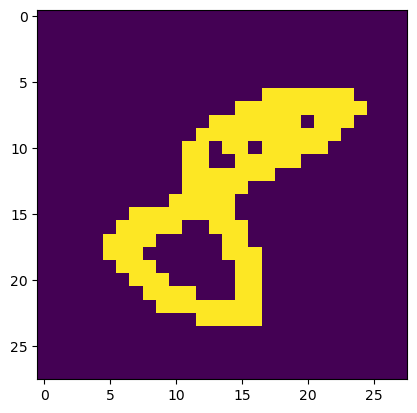

In [16]:
adad = np.random.randint(0,199)
adad_row = digitsdf.loc[adad,digitsdf.columns[1:]]
print(digitsdf.loc[adad,'label'])
reshaped_adad = np.reshape(adad_row,(28,28))
plt.imshow(reshaped_adad)

<h5>4)</h5>

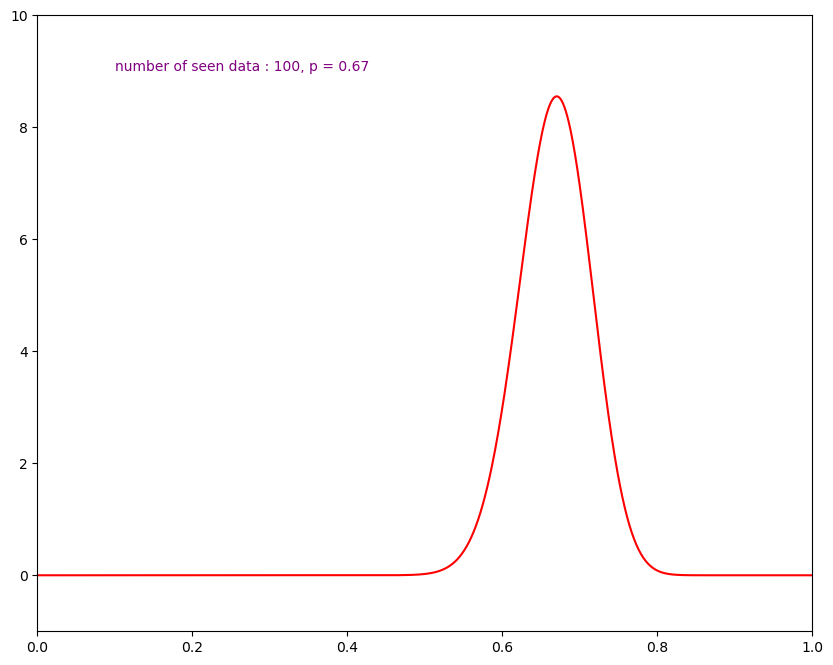

<Figure size 1000x800 with 0 Axes>

In [25]:
## you need these imports
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = sp.stats.beta.pdf(p,a=1, b=1)


def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    pny = p if n else 1-p
    #our dx is 1/1000 in here
    integral = np.sum(fy * pny) * 1/t
    post = (pny * fy) / integral
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  digitsdf[digitsdf['label'] == 8].iloc[i, digitsdf.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

<p align = 'center'>as we can see in the above code, the mode for this beta distribution is 0.67, which is represented in the pictures. that's what we report.</p>